In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras 
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # Python 3 code to rename multiple
# # files in a directory or folder

# # importing os module
# import os

# # Function to rename multiple files
# def main():

# 	folder = "train\Black Soil"
# 	for count, filename in enumerate(os.listdir(folder)):
# 		dst = f"Black_Soil_{str(count)}.jpg"
# 		src =f"{folder}/{filename}" # foldername/filename, if .py file is outside folder
# 		dst =f"{folder}/{dst}"
		
# 		# rename() function will
# 		# rename all the files
# 		os.rename(src, dst)

# # Driver Code
# if __name__ == '__main__':
	
# 	# Calling main() function
# 	main()


In [3]:
import os
path,dir,files = next(os.walk('/content/drive/MyDrive/train/combined'))
file_count = len(files)
print("Number of images: ",file_count)

Number of images:  156


In [4]:
from PIL import Image
import matplotlib.image as mpimg
import cv2

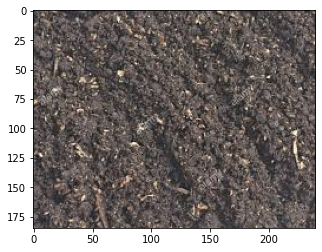

In [5]:
img = mpimg.imread(r'/content/drive/MyDrive/train/combined/Black_Soil_0.jpg')
imgplot = plt.imshow(img)
plt.show()

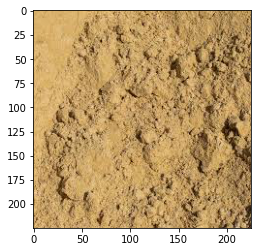

In [6]:
img = mpimg.imread(r'/content/drive/MyDrive/train/combined/Yellow_Soil_0.jpg')
imgplot = plt.imshow(img)
plt.show()

In [7]:
filenames = os.listdir('/content/drive/MyDrive/train/combined')

In [8]:
black = []
cinder = []
laterite = []
peat = []
yellow = []
for files in filenames:
    if files[0:5] == 'Black':
        black.append(files)
    elif files[0:6] == 'Cinder':
        cinder.append(files)
    elif files[0:8] == 'Laterite':
        laterite.append(files)
    elif files[0:4] == 'Peat':
        peat.append(files)
    elif files[0:6] == 'Yellow':
        yellow.append(files)
print(len(black),len(cinder),len(laterite),len(peat),len(yellow))

37 30 30 30 29


In [9]:
# os.mkdir('images_resized')
original_path = '/content/drive/MyDrive/train/combined/'
new_path = '/content/drive/MyDrive/images_resized/'

In [ ]:
# for i in range(len(filenames)):
#     filename = os.listdir(path)[i]
#     f_img = path+"/"+filename
#     img = Image.open(f_img)
#     img = img.resize((224, 224)) #(width, height)
#     img = img.convert('RGB')
#     new_img_path = new_path+'/'+filename
#     img.save(new_img_path)

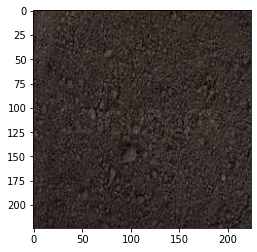

In [10]:
img = mpimg.imread(r'/content/drive/MyDrive/images_resized/Black_Soil_1.jpg')
imgplot = plt.imshow(img)
plt.show()

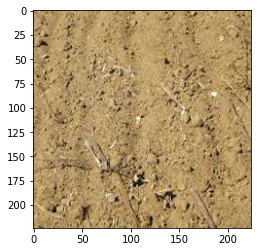

In [11]:
img = mpimg.imread(r'/content/drive/MyDrive/images_resized/Yellow_Soil_1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [12]:
import glob

In [13]:
image_directory = '/content/drive/MyDrive/images_resized/'
image_extensions = ['png','jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extensions]
soil_images = np.asarray([cv2.imread(file) for file in files])

In [14]:
soil_images.shape

(156, 224, 224, 3)

In [15]:
filenames = os.listdir('/content/drive/MyDrive/images_resized/')

In [16]:
labels = []
for i in range(0,len(filenames)):
    files = filenames[i]    
    if files[0:5] == 'Black':
        labels.append(0)
    elif files[0:6] == 'Cinder':
        labels.append(1)
    elif files[0:8] == 'Laterite':
        labels.append(2)
    elif files[0:4] == 'Peat':
        labels.append(3)
    elif files[0:6] == 'Yellow':
        labels.append(4)

In [17]:
labels.count(0), labels.count(1),labels.count(2), labels.count(3),labels.count(4)

(37, 30, 30, 30, 29)

In [18]:
X = soil_images
Y = np.asarray(labels)

In [19]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4])

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=35,stratify=Y)

In [21]:
Y_train.shape,Y_test.shape

((124,), (32,))

In [22]:
X_train_scaled = X_train/255

In [23]:
X_test_scaled = X_test/255

In [24]:
import tensorflow_hub as hub

In [25]:
mobile_net_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobile_net_model,input_shape=(224,224,3),trainable=False)

In [26]:
number_of_classes = 5

model = tf.keras.Sequential([pretrained_model,tf.keras.layers.Dense(number_of_classes)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [27]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [28]:
history = model.fit(X_train_scaled,Y_train,epochs=1000,validation_split=0.25)

Epoch 1/1000
3/3 [==============================] - 16s 781ms/step - loss: 1.7685 - acc: 0.3011 - val_loss: 1.8707 - val_acc: 0.1613
Epoch 2/1000
3/3 [==============================] - 0s 71ms/step - loss: 1.3378 - acc: 0.4624 - val_loss: 1.6720 - val_acc: 0.1935
Epoch 3/1000
3/3 [==============================] - 0s 71ms/step - loss: 1.0919 - acc: 0.6022 - val_loss: 1.5650 - val_acc: 0.2903
Epoch 4/1000
3/3 [==============================] - 0s 70ms/step - loss: 0.9100 - acc: 0.6667 - val_loss: 1.4940 - val_acc: 0.4194
Epoch 5/1000
3/3 [==============================] - 0s 70ms/step - loss: 0.7713 - acc: 0.7419 - val_loss: 1.4767 - val_acc: 0.3226
Epoch 6/1000
3/3 [==============================] - 0s 70ms/step - loss: 0.6636 - acc: 0.7957 - val_loss: 1.4257 - val_acc: 0.4194
Epoch 7/1000
3/3 [==============================] - 0s 72ms/step - loss: 0.5755 - acc: 0.8602 - val_loss: 1.3962 - val_acc: 0.4194
Epoch 8/1000
3/3 [==============================] - 0s 89ms/step - loss: 0.5050 -

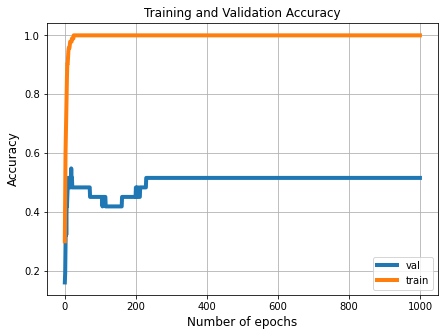

In [29]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_acc'],linewidth = 4)
plt.plot(history.history['acc'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

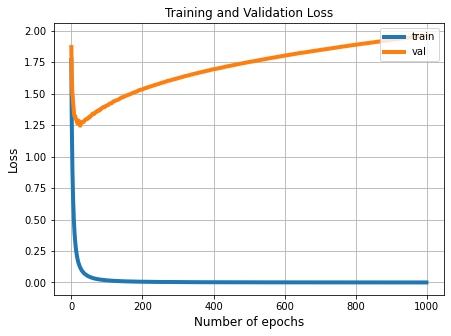

In [30]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()
plt.show()


In [31]:
score,acc = model.evaluate(X_test_scaled,Y_test)
print("Test Loss = ",score)
print("Test Acc = ",acc)

1/1 [==============================] - 1s 735ms/step - loss: 1.3428 - acc: 0.7500
Test Loss =  1.3428456783294678
Test Acc =  0.75


0
Black Soil


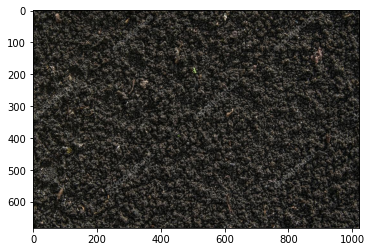

In [33]:
img_test = cv2.imread(r'/content/drive/MyDrive/test/black soil.jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'/content/drive/MyDrive/test/black soil.jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Black Soil")
elif input_label == 1:
    print("Cinder Soil")
elif input_label == 2:
    print("Laterite Soil")
elif input_label == 3:
    print("Peat Soil")
elif input_label == 4:
    print("Yellow Soil")

4
Yellow Soil


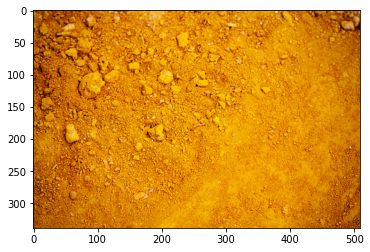

In [34]:
img_test = cv2.imread(r'/content/drive/MyDrive/test/yellow soil.jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'/content/drive/MyDrive/test/yellow soil.jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Black Soil")
elif input_label == 1:
    print("Cinder Soil")
elif input_label == 2:
    print("Laterite Soil")
elif input_label == 3:
    print("Peat Soil")
elif input_label == 4:
    print("Yellow Soil")

3
Peat Soil


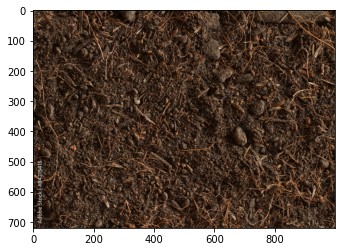

In [35]:
img_test = cv2.imread(r'/content/drive/MyDrive/test/peat soil.jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'/content/drive/MyDrive/test/peat soil.jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Black Soil")
elif input_label == 1:
    print("Cinder Soil")
elif input_label == 2:
    print("Laterite Soil")
elif input_label == 3:
    print("Peat Soil")
elif input_label == 4:
    print("Yellow Soil")